In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plotting
import numpy as np


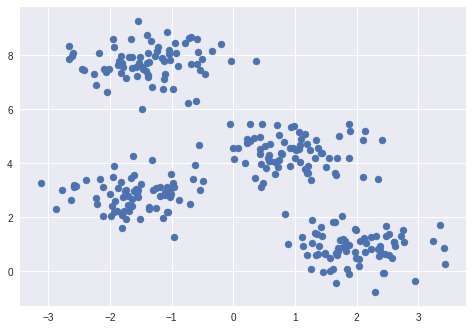

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X ,y_true = make_blobs(n_samples =300 ,centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0],X[:,1], s=50);


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means=kmeans.predict(X)
y_means

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2, 3,
       0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3, 0, 0,
       1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0, 1, 2, 1,
       0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2,
       1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3, 0, 0, 2, 1, 2,
       3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1,
       3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1, 2, 2, 3, 0, 2, 3, 0, 0,
       3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 3, 0, 2, 0, 3, 1, 0,
       1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3, 1, 2, 2, 0, 2, 0, 3, 1, 1, 3,
       3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3, 2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2,
       3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2, 1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1,
       0], d

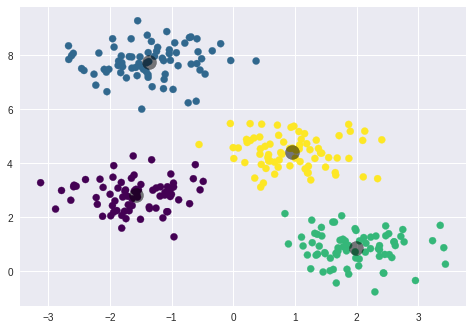

In [10]:

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters , rseed=2):
    # randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #assign labels based on closest distances
        labels = pairwise_distances_argmin(X, centers)
        
        # find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range (n_clusters)])
        
        # check for convergence 
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers ,labels

centers ,labels = find_clusters(X,4)
plt.scatter(X[:,0] ,X[:,1] , c = y_means, s= 50, cmap='viridis')
plt.scatter (centers[:,0], centers[:,1], c='black', s=200, alpha= 0.5);
